# Stoneburner, Kurt
- ## DSC 550 - Week 03

In [1]:
import os
import sys
# //*** Imports and Load Data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#//*** Reference for efficient font handline. These would have been nice to know before submission
#axes.labelsize - Fontsize of the x and y labels
#axes.titlesize - Fontsize of the axes title
#figure.titlesize - Size of the figure title (Figure.suptitle())
#xtick.labelsize - Fontsize of the tick labels
#ytick.labelsize - Fontsize of the tick labels
#legend.fontsize - Fontsize for legends (plt.legend(), fig.legend())

**A. Display the same analysis (of the same data) using 3 different charts (e.g.,  a bar chart, a line chart and a pie chart)**

**B. Use appropriate, complete, professional labeling.**

In [2]:
#//*** I originally used this data as part of my DSC540 project which looked at the Statewide Ethnic COVID cases vs the 
#//*** the total County COVID cases. For this example I used the statewide racial case data from January 15th 2021. 
#//*** The Ethnic COVID numbers are presented in cases per 100 thousand (statewide). For this exercise I wanted to 
#//*** To compare the actual numbers to the expected values based on the ethnic percentage of the population.

#//*** I struggle to work with dimensionality in Data. Expected vs Actual is a common task for me. When Dealing with 
#//*** COVID per captial numbers, I'm often working with State Expected values, Ethnic Expected Values, and Actual Values
#//*** Across multiple Counties (up to 56) across a Time Series.I may be trying to display too much. 
#//*** This is a problem for the term project But I'm thinking about it now

#//*** Convert the State Ethnic Populations into a percentage of the total to generate the expected values
pop_state = {'total': 39512223, 'Latino': 15574880, 'White': 14423748, 'Asian': 5869038, 'Black': 2221363, 'Multiracial': 1114409}

#//*** Build the Precentage of each population in the expected_state dictionary.
expected_state = {}
for key,value in pop_state.items():
    expected_state[key] = value/pop_state['total']

#//*** The total Statewide COVID cases in 100k.
total_100k = 125.78481

#//*** Generate the Expected Case Values, which are the ethnic percentages * the total COVID cases for the Day.
#//*** Example: Latinos comprise 39% of the Population. The expected value is 49.0560759 (.39 * 125.78481)
expected_cases = []
for key,value in expected_state.items():
    print(key,value,total_100k)
    expected_cases.append(value*total_100k)

total 1.0 125.78481
Latino 0.3941787836133644 125.78481
White 0.36504521651439353 125.78481
Asian 0.1485372766801807 125.78481
Black 0.05621964119811735 125.78481
Multiracial 0.028204158495461013 125.78481


In [3]:
#//*** Data and Labels to work with
ethnic = [ 'total', 'Latino','White', 'Asian', 'Black', 'Multiracial']
cases_100k = [125.78481, 50.739241,  16.503797,  6.0, 3.529114, 1.177215]

#//*** Pre-Fixed Color-palette. This Keeps label colors the same across all graphs
race_palette = ["#F0817B","#E994C2","#A6BBF0","#4FDCE5","#74EEAB","#D8F06F"]

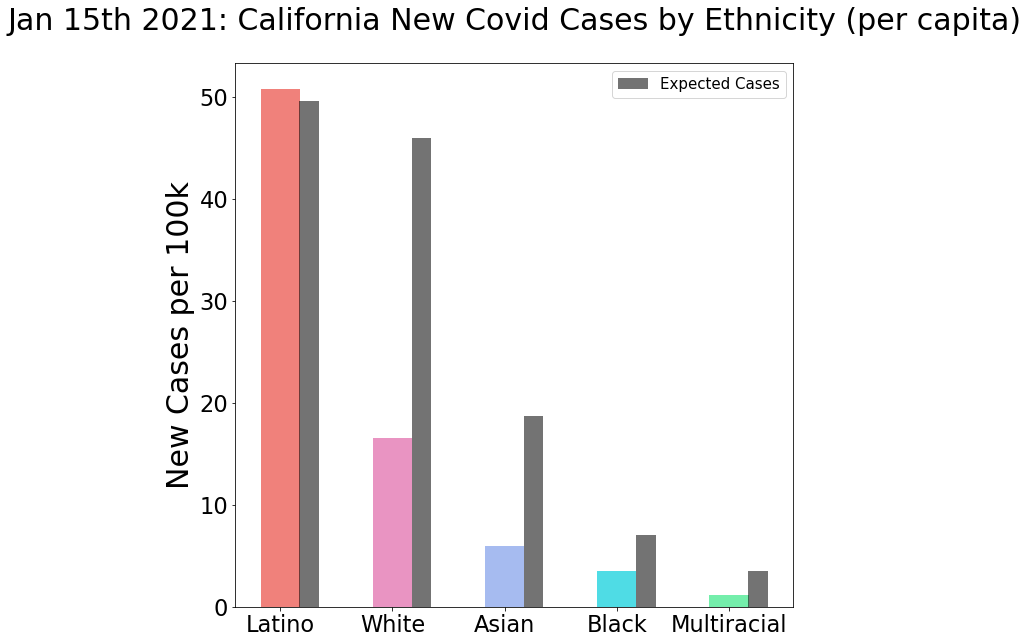

In [20]:
#//*** Intent: Plot a Bar Chart displaying actual vs expected values. 

#//*** Index is Used as an offset value which is used to draw the individual bar graphs
index = np.arange(len(ethnic)-1)

#//*** Font value to apply across the plot
bar_font_size = 30

#//*** Somewhat arbitrary value of the display Bar width
bar_width = .35

#//*** Define Subplots
fig, ax = plt.subplots(figsize=(10, 10))

#//*** Draw the Actual Values
#//*** X = Index which is a range 1 - 5
#//*** Y = Actual Case Values per 100k
#//*** Bar Width (How Wide to draw)
#//*** Color = List based color palette
#//*** Note: No Labels, we don't want the ethnicity to be drawn in the legend
plt.bar(index,cases_100k[1:], bar_width, color=race_palette)

#//*** Draw the Expected Values
#//*** X = Index + a multiple of the bar width. The multiple is to account for different sized bar widths
#//*** Y = Expected Case Values per 100k
#//*** Multiple of Bar Width (How much smaller to draw the bar)
#//*** Color = Hardcoded to black, with an alpha of .55 to make it gray(ish)
#//*** Label = Only one label for the Legend
plt.bar(index+bar_width/1.35,expected_cases[1:], bar_width/2,color= 'black',alpha=.55,label='Expected Cases')

plt.title("Jan 15th 2021: California New Covid Cases by Ethnicity (per capita)",fontsize=bar_font_size,y=1.05)

#//*** Label the X axis. Replaces the index values with the labels in the ethnic list.
plt.xticks(index,ethnic[1:],fontsize=bar_font_size*.75)
plt.yticks(fontsize=bar_font_size*.75)

#//*** Label the Y axis
plt.ylabel("New Cases per 100k", fontsize=bar_font_size)

#//*** Draw the Legend
plt.legend(fontsize=bar_font_size*.5)

#//*** Display the Graph
plt.show()

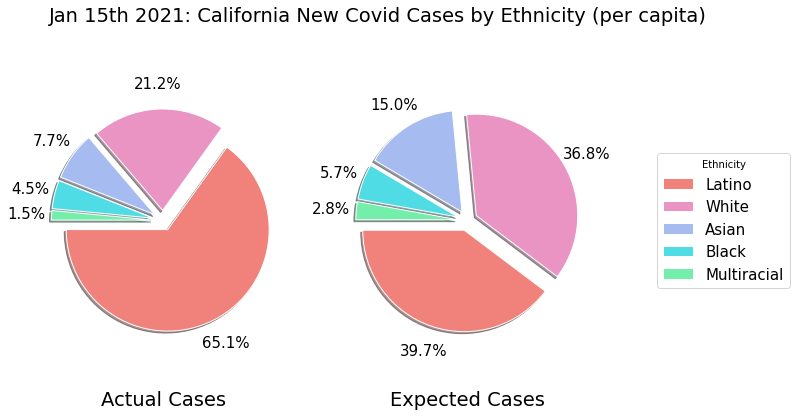

In [10]:
#//*** Intent: Plot Two Pie Charts displaying actual vs expected values. 
#//*** Two Charts looked better than a nested chart.

#//*** The Explode value is how much to separate each slice from the chart. Value of 0 means  keep attached
#//*** Larger the value the larger the separation. The explode value is an array of n objects based on input size.
explode = (0.1, .1, .1, .1, .1)  

#//*** Set a font size to be used throughout the plt.
pie_font_size = 15

#//*** Arbitrary value to determine wedge size
#//*** Size = 1 make a pie
#//*** Size < 1 makes a donut, Useful for nested pie charts. 
size = 1

#//*** Figsize, total size of the plot in relative size
#//*** subplots(1,2) - Multiple plots represented as 1 row, 2 columns
#//*** ax1 = plot 1,1 (or the one on the left)
#//*** ax2 = plot 1,2 (or the plot on the right)
fig1, (ax1,ax2) = plt.subplots(1,2, figsize=(10, 10))

#//*** Wedges is needed for the legend. Unsure on uses for labels and autotexts
#//*** Draws a pie chart using cases_100k 
wedges, labels, autotexts = ax1.pie(cases_100k[1:], 
                                                    explode=explode,  #Defines the explode parameter
                                                    #labels=ethnic[1:], #No Ethnic Labels, these go in the legend 
                                                    autopct='%1.1f%%',#//*** Auto generate percentages
                                                    shadow=True, #Shadow Boolean
                                                    startangle=180, #Indicates graph rotation. This is rotated to make 
                                                                    #the smallest slices more readable.
                                                    radius = 1, # Sizing Parameter. Bigger is bigger
                                                    colors=race_palette,
                                                    pctdistance=1.25, #moves the text away from the pie
                                                    textprops={'fontsize': pie_font_size}, 
                                                    wedgeprops=dict(width=size, edgecolor='w'))


#//*** Draws the expected values in the right most pie chart    
ax2.pie(expected_cases[1:], 
                         explode=explode, 
                        #labels=ethnic[1:], 
                        autopct='%1.1f%%',
                        shadow=True, 
                        startangle=180, 
                        radius = 1,
                        colors=race_palette,
                        pctdistance=1.25,
                        textprops={'fontsize': pie_font_size},
                        wedgeprops=dict(width=size, edgecolor='w'))

#//*** Draws the legend based on wedges value and the ethnic data
ax1.legend(wedges, ethnic[1:],
          fontsize=pie_font_size,
          title="Ethnicity",
          loc="center right",
          bbox_to_anchor=(1, 0, 2, 1))

#//*** Left Title
ax1.set_title("Actual Cases",y=-.25,fontsize=pie_font_size*1.3) 
#//*** Right title
ax2.set_title("Expected Cases",y=-.25,fontsize=pie_font_size*1.3)

#//*** plt.title would not render with the other two set_title values. suptitle has the same effect.
#//*** Not sure how it is different but it works.
plt.suptitle("Jan 15th 2021: California New Covid Cases by Ethnicity (per capita)", y=.80, x=.6,fontsize=pie_font_size*1.3)

#//*** Display the plot
plt.show()

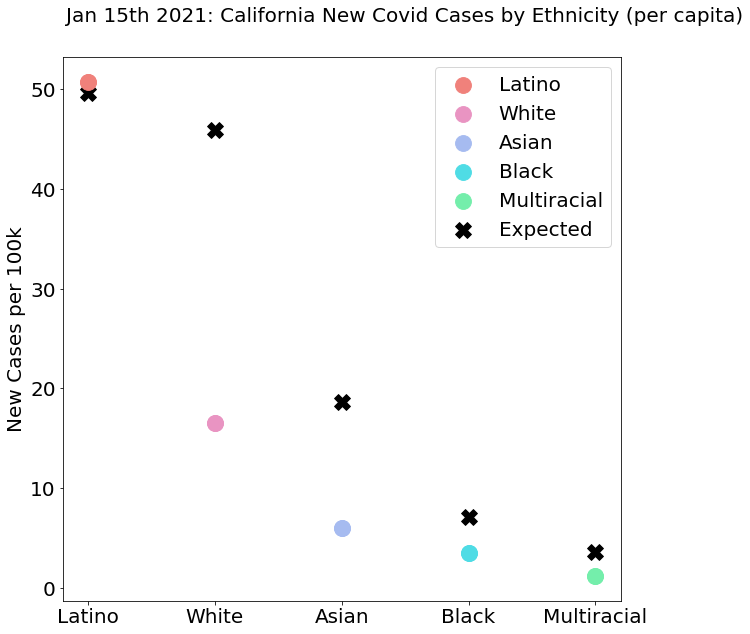

In [21]:
#//*** Intent: Plot a Scatter Chart displaying actual vs expected values. 
#//*** This is not what a scatter plot is designed for. Obviously, if we're shoehorning in 2-D data with a loop
#//*** Something is amiss.
#//*** I originally planned to use a colorbar chart. I ended up spending a considerable amount of time before I realized
#//*** I was doing it wrong. A better choice and closer to my vision would have been two horizontal nested bar charts.
#//*** I avoided those since i'd be making two bar charts. In hindsight, they'd be different enough. But, well I went
#//*** route. It's not ideal, but it took a fair bit to get the colors and labels right.

#//*** Set the plot font size
scatter_font_size = 20

#//*** Somewhat arbitrary value of the display Bar width
marker_size = 250

#//*** Define Subplots
#//*** Figsize is the relative figure size. Bigger number mean bigger renders.
fig, ax = plt.subplots(figsize=(10, 10))

#//*** Index used as the value for the expected scatter plot
index = np.arange(len(ethnic)-1)

#//*** Scatter plots only accept a single label value per plot.
#//*** To Color each plot, a loop is used to draw each point and apply the appropropriate label.

#//*** Set a loop for the length of ethnic. A Range loop is used to synchronize the index value when
#//*** Accessing multiple lists.
for x in range(len(ethnic[1:])):
    ax.scatter(                #//*** Scatter plot
        ethnic[1:][x],         #//*** X axis: Loop through ethnic data indicvidually
        cases_100k[1:][x],     #//*** Y Axis: Loop through cases data individually
        color=race_palette[x], #//*** Color: Assign color individually
        label=ethnic[1:][x],   #//*** Assign the label individually, based on the ethnic value
        s=marker_size,         #//*** Set the size of the marker object (icon on the plot)
    )

#//*** Draw the expected value. This runs like a traditional scatter plot since, these values
#//*** Use a single color and label for all values.
ax.scatter(
    index,              #//*** X Axis: Generic index of 0-4. This keeps the plotted values aligned with the labels
    expected_cases[1:], #//*** Y Axis: Expected Values 
    color='black',      #//*** Color: Assigned to Black
    marker='X',         #//*** Marker Type: Assigned to Fat X
    label='Expected',   #//*** Label for the legend 
    s=marker_size,      #//*** Set the size of the marker object (icon on the plot)
    )

#//*** Draw the Cases Again without the labels. In Cases of overlap, this draws on top of the expected values.
#//*** This is placed a second time so the expected value moves to the bottom of the legend. 
#//*** I''m sure there is a better way to manipulate the legend labels, but this expedient works.
for x in range(len(ethnic[1:])):
    ax.scatter(ethnic[1:][x],cases_100k[1:][x],color=race_palette[x],s=marker_size)

#//*** Label the X axis. Replaces the index values with the labels in the ethnic list.
plt.xticks(ethnic[1:],fontsize=scatter_font_size)

#//*** Set the fontsize for the ytick labels
plt.yticks(fontsize=scatter_font_size)

#//*** Label the Y axis
plt.ylabel("New Cases per 100k",fontsize=scatter_font_size)

#//*** Suptitle works above, it works here
plt.suptitle("Jan 15th 2021: California New Covid Cases by Ethnicity (per capita)", y=.95, x=.6,fontsize=scatter_font_size)

#//*** Draw the Legend
plt.legend(fontsize=20)

#//*** Display the Graph
plt.show()

**C. Rank your charts from most effective to least effective.**

1. Pie Chart
1. Bar Chart
1. Scatter Plot

**D. Write a 300-word paper justifying your ranking.**

Expressing the difference between expected and actual values is a visual challenge I'm keenly interested in addressing. For DSC540 I looked at the differences between the Statewide Ethnic COVID values and compared them to Statewide total COVID values. Do counties that have the highest portion of an ethnic population have a disproportionate amount of COVID cases? For DSC550 I'm hoping to use the ethnic state COVID numbers, to model the county ethnic COVID Cases. The challenge is looking at multiple county time series and plot the differences between the expected and actual values. It gets to be visually complex quite quickly. This is a long winded explanation as to why I chose this particular slice of real data.

When dealing with just this limited slice of data, the pie chart is the strongest plot. It revealed the most interesting data. By expressing the values as a percenatge of a whole, it highlights the differences between the expected and actual COVID values. When plotted linearly neither the scatter plot or the bar chart demonstrate that Latinos comprise 65.1% of all new COVID cases in Califnornia. The other plots imply the Latino COVID data is slightly greater than their expected representation across the state. The pie chart hints that Latinos may bear a substantial and disproportionate COVID burden.

## Other Visualization Critique ##
This isn't part this week's assignment. I would appreciate feedback on  visualizations from my DSC540 project. I intend to build on this work during DSC550. 

These visualizations need some help. Do you have any advice on how to approach a time series comparing expected vs actual values?

This graph compares the statewide Latino New COVID cases throughout the pandemic and compares against the expected values if COVID affected the entire population equally.

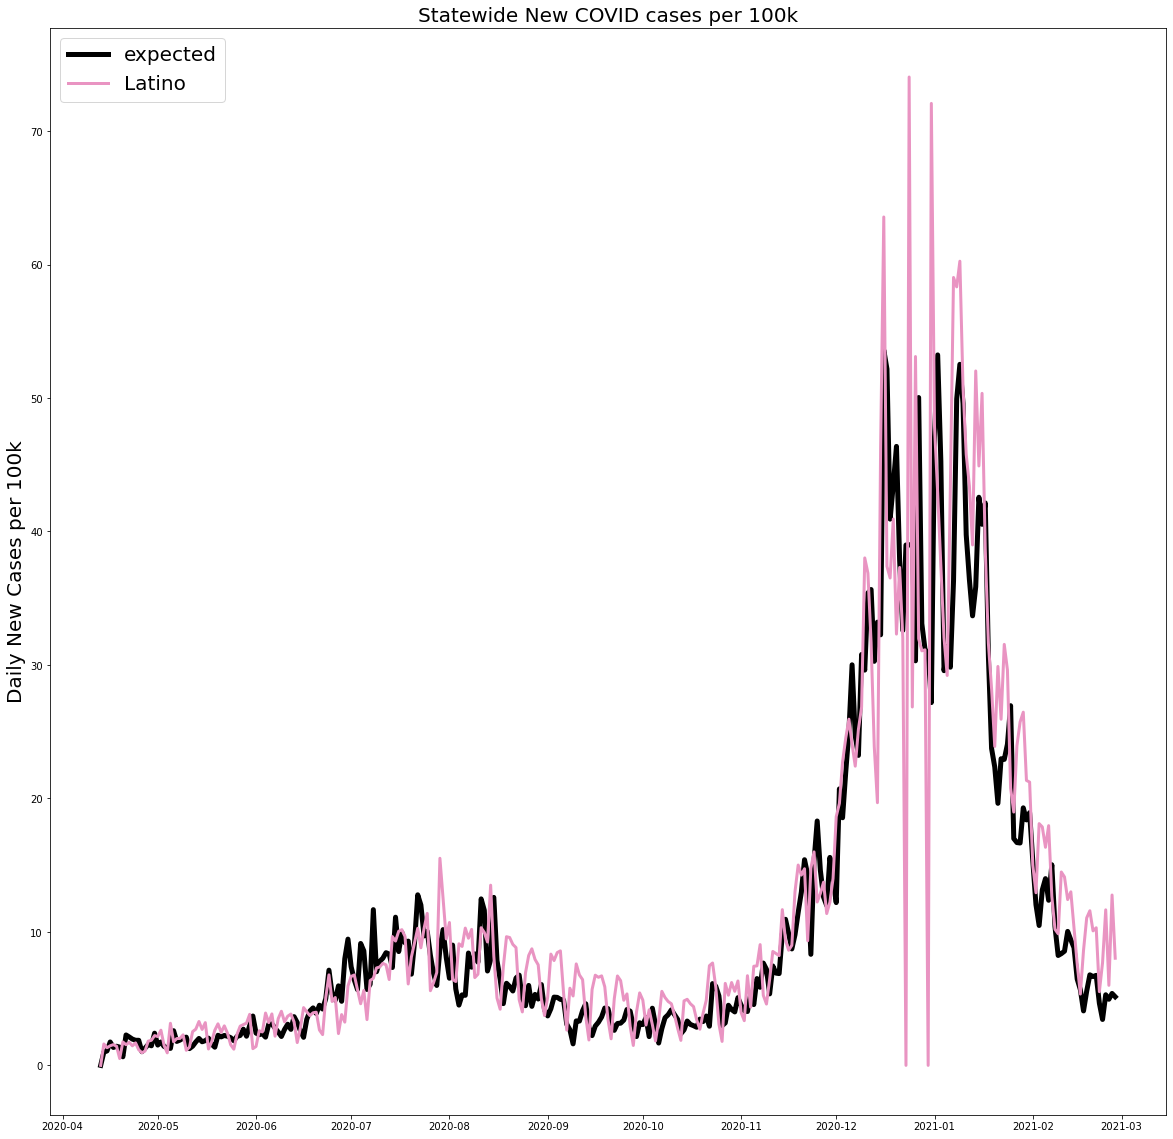

Every county with a population greater than 100k. Cases are represented in cases per 100 thousand which normalizes the case rate across counties of disparate sizes. The fascinating part of this plot is Los Angeles county (29% of the State's population) is lost in the noise and is close to the per capita rate of the state. This plot demonstrates that certain counties (such as imperial which is 89% Latino) were hit disproportionately hard.

There is great and telling information in this plot but it is too noisy

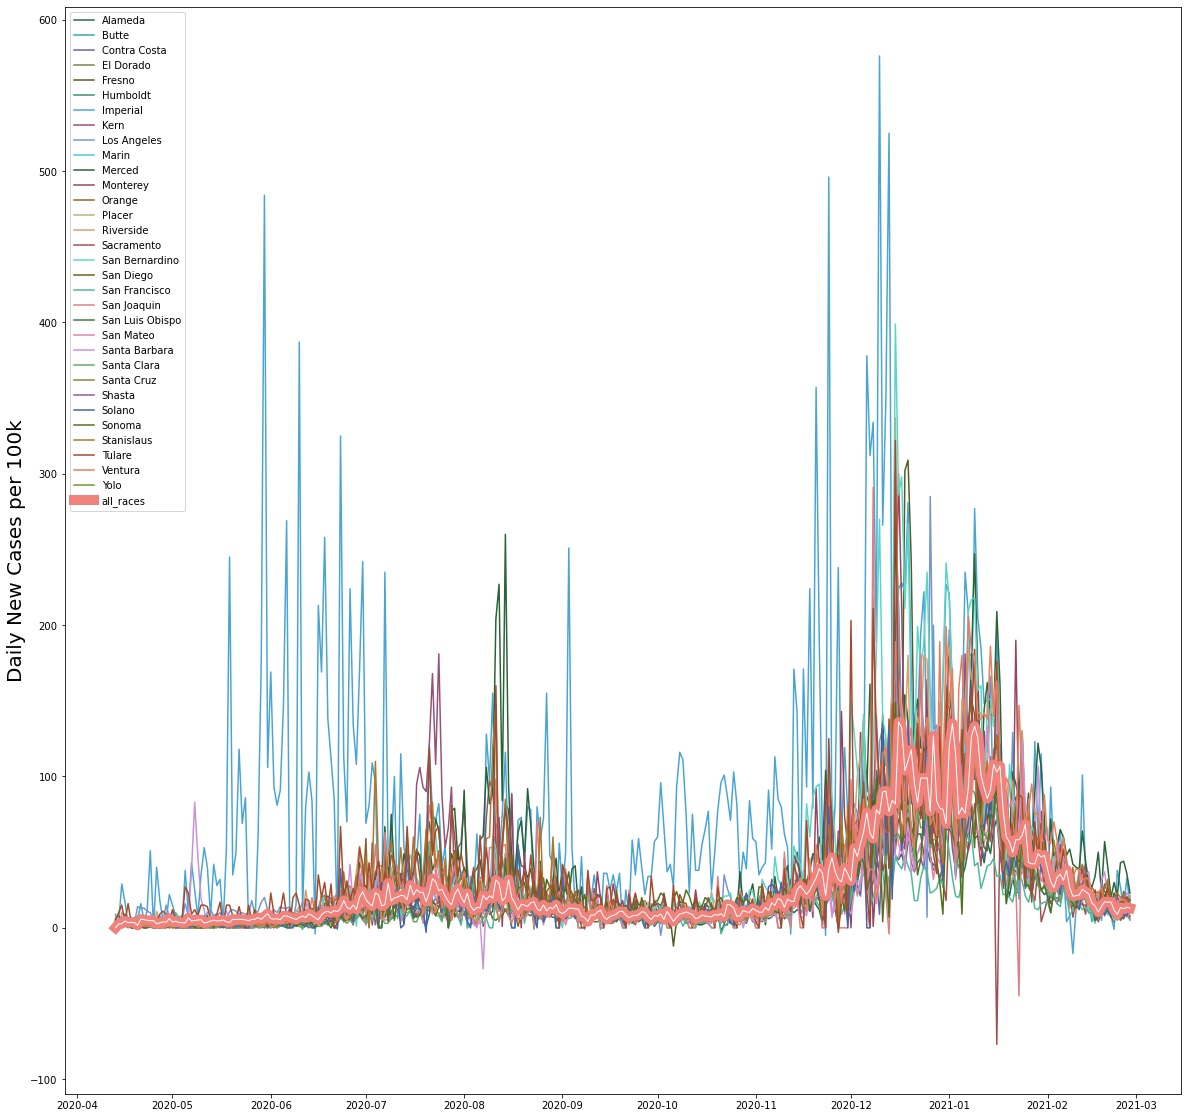

Top 6 counties with highest portion of Latinos by population. In Counties over 100k. All of these counties exceed the statewide COVID case rate and are greatly above the statewide Latino case prevalence.

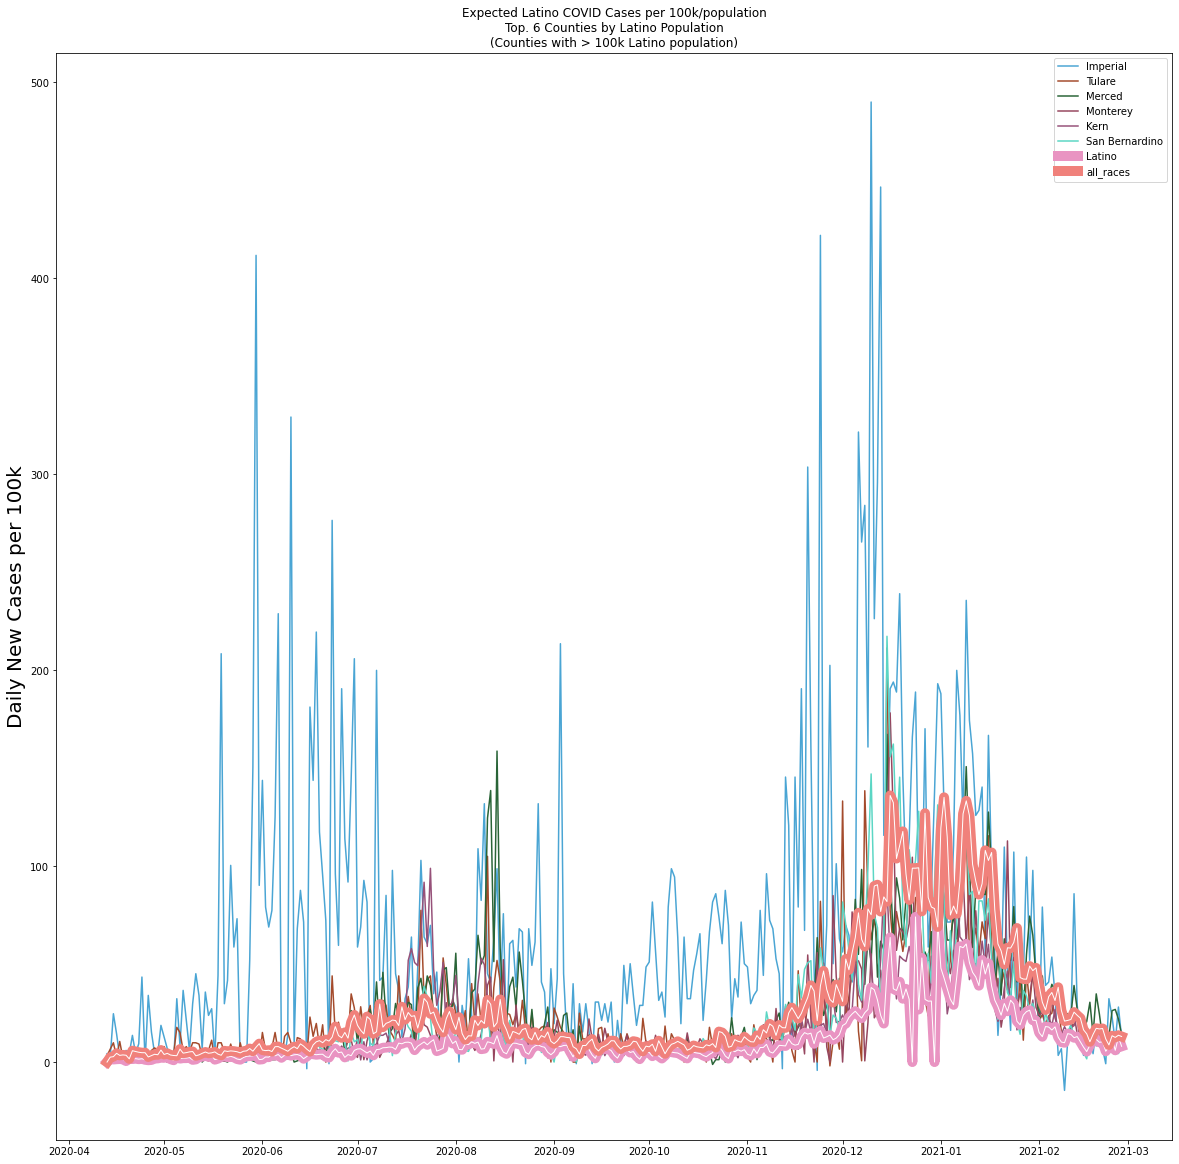

I find visualizations particularly challenging. I took two semesters of graphic design in college. Which was long enough to determine that I have little talent for graphic design and solving visual problems. This isn't an excuse, just an ackowledgment of weakness. 

Any assistance or guidance on improving my visualizations would be greatly appreciated.